In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import linalg
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [15]:
# images with the same dimensions
image1 = 'dog.jpg'
image2 = 'goodhills.jpg'

1024 839
<class 'numpy.ndarray'>


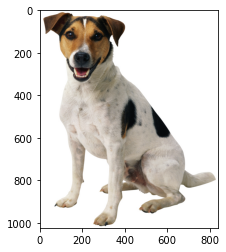

In [16]:
img=mpimg.imread(image1)
dimensions = img.shape
print(dimensions[0], dimensions[1])
print(type(img))
imgplot = plt.imshow(img)

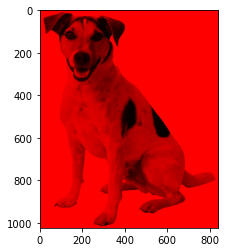

In [17]:
#displaying only the red channel of the image
color = img.copy() 
color[:,:,1] = 0
color[:,:,2] = 0
imgplot = plt.imshow(color)

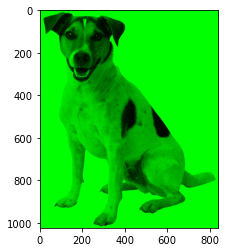

In [18]:
#displaying only the green channel of the image
color = img.copy() 
color[:,:,0] = 0
color[:,:,2] = 0
imgplot = plt.imshow(color)

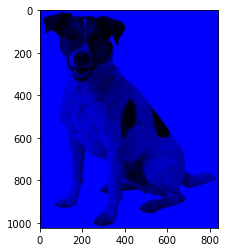

In [19]:
#displaying only the blue channel of the image
color = img.copy() 
color[:,:,0] = 0
color[:,:,1] = 0
imgplot = plt.imshow(color)

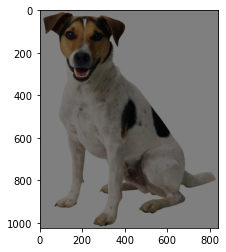

In [20]:
#scaling the intensity of the image
p=0.5

color = img.copy() 
color[:,:,1] = color[:,:,1]*p
color[:,:,2] = color[:,:,2]*p
color[:,:,0] = color[:,:,0]*p
imgplot = plt.imshow(color)          


1024 839
<class 'numpy.ndarray'>


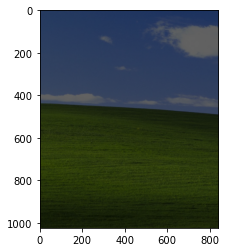

In [21]:
#scaling the intensity of the second image
p = 0.6
img2=mpimg.imread(image2)
dimensions2 = img.shape
print(dimensions2[0], dimensions2[1])
print(type(img2))

color = img2.copy() 
color[:,:,1] = color[:,:,1]*(1-p)
color[:,:,2] = color[:,:,2]*(1-p)
color[:,:,0] = color[:,:,0]*(1-p)
imgplot = plt.imshow(color)

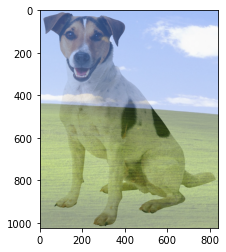

In [22]:
#overlaying two images by treating each color channel as a linear combination of the two images
alpha=0.5
color = img.copy() 
color2 = img2.copy() 
color[:,:,1] = (alpha*color[:,:,1] + (1-alpha)*color2[:,:,1])
color[:,:,2] = (alpha*color[:,:,2] + (1-alpha)*color2[:,:,2])
color[:,:,0] = (alpha*color[:,:,0] + (1-alpha)*color2[:,:,0])
imgplot = plt.imshow(color)
imgplot = plt.imshow(color)

In [23]:
#a slider widget to test different alpha values
def f(alpha):
    color = img.copy() 
    color2 = img2.copy() 
    color[:,:,1] = (alpha*color[:,:,1] + (1-alpha)*color2[:,:,1])
    color[:,:,2] = (alpha*color[:,:,2] + (1-alpha)*color2[:,:,2])
    color[:,:,0] = (alpha*color[:,:,0] + (1-alpha)*color2[:,:,0])
    imgplot = plt.imshow(color)
    
interact(f, alpha=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

In [24]:
color = img.copy() 
dimensions = color.shape

R = color[:,:,0]
G = color[:,:,1]
B = color[:,:,2]
dimensions = R.shape

print(R, G, B)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [25]:
UR, sR, VhR = np.linalg.svd(R)
UG, sG, VhG = np.linalg.svd(G)
UB, sB, VhB = np.linalg.svd(B)


print(sR, sG, sB)

[2.00950120e+05 3.31698792e+04 1.70090992e+04 1.68352462e+04
 1.29738589e+04 9.55124930e+03 8.04098907e+03 7.91332734e+03
 6.71815434e+03 5.50586045e+03 5.23317855e+03 5.07980069e+03
 4.71536974e+03 4.67586350e+03 3.58007865e+03 3.53191252e+03
 3.46302245e+03 3.37826775e+03 3.22987419e+03 2.96306390e+03
 2.82855566e+03 2.68372518e+03 2.58862505e+03 2.46083961e+03
 2.33355155e+03 2.28189372e+03 2.22545976e+03 2.11223542e+03
 2.03819809e+03 1.98537052e+03 1.91412367e+03 1.83912927e+03
 1.81309822e+03 1.76646439e+03 1.70639871e+03 1.61844798e+03
 1.55897109e+03 1.51164932e+03 1.48398861e+03 1.44159479e+03
 1.42238830e+03 1.40313620e+03 1.35280443e+03 1.27632948e+03
 1.27392083e+03 1.25539602e+03 1.22214016e+03 1.16042885e+03
 1.12905724e+03 1.11299741e+03 1.09912248e+03 1.07185903e+03
 1.03672006e+03 1.01840901e+03 9.94289964e+02 9.81569931e+02
 9.74776502e+02 9.47043395e+02 9.38802900e+02 9.21505338e+02
 8.94387503e+02 8.87503140e+02 8.71047953e+02 8.52582615e+02
 8.44657164e+02 8.253136

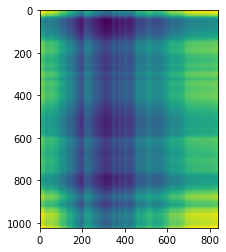

In [26]:
rank=1

color = img.copy()


def rank_approx(matrix, rank):
  U, s, V = np.linalg.svd(matrix, full_matrices = False)
  return np.dot(U[:,:rank], np.dot(np.diag(s[:rank]), V[:rank,  :]))



reduced=rank_approx(R,rank)

imgplot = plt.imshow(reduced)

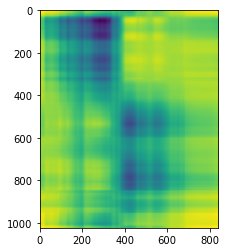

In [27]:
rank=2
color=img.copy()
def rank_approx(matrix, rank):
  U, s, V = np.linalg.svd(matrix, full_matrices = False)
  return np.dot(U[:,:rank], np.dot(np.diag(s[:rank]), V[:rank,  :]))


reduced=rank_approx(R,rank)
imgplot = plt.imshow(reduced)


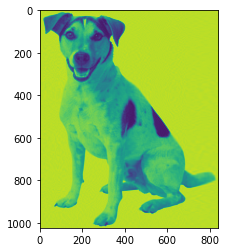

In [28]:
k = 100


rank=k
color=img.copy()
def rank_approx(matrix, rank):
  U, s, V = np.linalg.svd(matrix, full_matrices = False)
  return np.dot(U[:,:rank], np.dot(np.diag(s[:rank]), V[:rank,  :]))


reduced=rank_approx(R,rank)
imgplot = plt.imshow(reduced)